#Instructions
* **<font color="red">When you load this page, go to "Cell->Run All" to start the program running.  After that point, you should be able to use the sliders and buttons to manipulate the output.</font>**  
* If things go totally awry, you can go to "Kernel->Restart"  and then "Cell->Run All".  A more drastic solution would be to close and reload the page, which will reset the code to its initial state.  
* If you're interested in programming, click the "Toggle raw code" button.  This will expose the underlying program, written in the Python3 programming language.  You can edit the code to your heart's content: just go to "Cell->Run All" after you modify things so the changes will be incorporated.  Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code

In [1]:
# -----------------------------------------------------------------------------------
# Javascript that gives us a cool hide-the-code button 

from IPython.display import HTML

HTML('''

<script>
    code_show=true; 
    
    function code_toggle() {
     if (code_show){
         $('div.input').hide();
     } else {
         $('div.input').show();
     }
     code_show = !code_show
    } 
    
    $( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle raw code">
</form>

''')

# ------------------------------------------------------------------------------------

The following simulates the unimolecular conversion of substrate $S$ into product $P$:

$$S \rightleftarrows P$$

The conversion rate is given by an Arrhenius relationship, depending on the barrier height $E_{a}$, a prefactor roughly corresponding to collision rate $A$, and $RT$. 

$$k = A \cdot e^{(-E_{a}/RT)}$$

The concentration of product as a function of time is given by another exponential and depends on the rate $k$ determined above and the initial concentration of substrate $[S]_{0}$:

$$[P](t) = [S]_{0}\cdot (1 - e^{-kt})$$

NOTE: This analysis assumes we are in an "infinite enzyme" regime.  The physical underpinnings of enzymes remain the same when we have less enzyme, but the kinetics are more complex to analyze -- as we'll see when we get to Michaelis-Menten kinetics.


In [2]:
#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


:0: FutureWarning: IPython widgets are experimental and may change in the future.


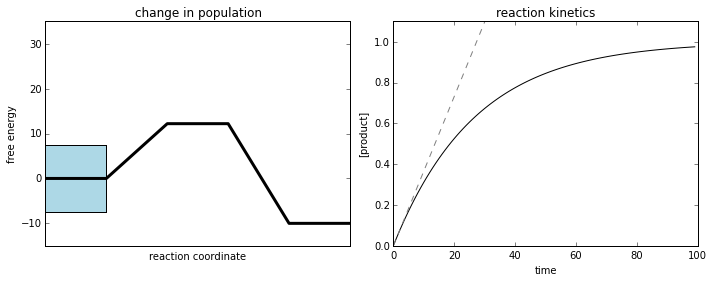

In [3]:
def arrhenius(t,S0,A,Ea,T):
    """
    The arrhenius equation. 
    """
    
    k = A*np.exp(-Ea/(0.0083*T))
    
    return S0*(1-np.exp(-k*t))
    

def plot_arrhenius(Ea,A):
    """
    Create a pretty plot of an arrhenius plot.
    """
        
    S0 = 1
    R = 0.0083
    T = 300
    t_max = 10000
    
    fig, ax = plt.subplots(1,2)
    
    # Plot reaction coordinate
    x = np.array(range(6))
    y = np.array([0,0,Ea,Ea,-10,-10],dtype=float)
    ax[0].plot(x,y,color="black",linewidth=3)
    
    # Make plot pretty
    ax[0].set_xlabel("reaction coordinate")
    ax[0].set_ylabel("free energy")
    ax[0].set_title("change in population")
    ax[0].get_xaxis().set_ticks([])
    ax[0].set_ylim([-15,35])
    
    # plot relative populations
    RT = R*T
    Q = 1 + np.exp(-Ea/RT)
    
    v0 = 15/Q
    ax[0].add_patch(
        patches.Rectangle((0,-v0/2),1,v0,facecolor="lightblue")
    )
    
    v1 = 15*np.exp(-Ea/RT)/Q
    ax[0].add_patch(
        patches.Rectangle((2,Ea-v1/2),1,v1,facecolor="lightblue")
    )
    
    #### RATE PLOT

    # Plot main P vs. curve
    smooth_x = np.array(range(0,t_max,100),dtype=float)*0.01
    smooth_y = arrhenius(smooth_x,S0,A,Ea,T)    
    ax[1].plot(smooth_x,smooth_y,color="black")
    
    # draw initial rate line
    m = (smooth_y[1]-smooth_y[0])/(smooth_x[1]-smooth_x[0])
    b = smooth_y[0]-(m*smooth_x[0])
    this_x = np.array((0,t_max))
    ax[1].plot(this_x,this_x*m+b,"--",color="gray")
    
    # set plot dimensions
    ax[1].set_xlim([0,t_max*0.01])
    ax[1].set_ylim([0,1.1])
    
    # axis labels
    ax[1].set_xlabel("time")
    ax[1].set_ylabel("[product]")
    ax[1].set_title("reaction kinetics")
    
    # Global formatting
    fig.set_figwidth(10)
    fig.tight_layout()
    plt.show()
        

# graph for running display
A_slider = widgets.FloatSlider(min=0,max=100,step=5,value=5)
Ea_slider = widgets.FloatSlider(min=0,max=25,by=2.5,value=12.5)

w = widgets.interactive(plot_arrhenius,A=A_slider,Ea=Ea_slider)
                        
display(w)


The blue boxes on the free energy diagram denote the relative populations of $S$ and the transition state $S^{*}$ at $t = 0$.